In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e9/sample_submission.csv
/kaggle/input/playground-series-s4e9/train.csv
/kaggle/input/playground-series-s4e9/test.csv


In [3]:
import seaborn as sns
sns.set()
sns.set_palette('viridis')
SNS_CMAP = 'viridis'

colors = sns.palettes.color_palette(SNS_CMAP)

In [4]:
test_data = pd.read_csv('/kaggle/input/playground-series-s4e9/test.csv')
test_data.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


In [5]:
train_data = pd.read_csv('/kaggle/input/playground-series-s4e9/train.csv')
train_data.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [6]:
test_data.shape

(125690, 12)

In [7]:
# len(test_data) = 125690 len(train_data) = 188533

In [8]:
test_data['price'] = np.nan
test_data.columns==train_data.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [9]:
merged_data = pd.concat([train_data,test_data], axis=0)
merged_data.columns = merged_data.columns.str.lower()
merged_data.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200.0
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999.0
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900.0
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000.0
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500.0


In [10]:
merged_data.price.fillna(merged_data.price.mean(), inplace = True)

/tmp/ipykernel_30/2358383489.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data.price.fillna(merged_data.price.mean(), inplace = True)


In [11]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 314223 entries, 0 to 125689
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            314223 non-null  int64  
 1   brand         314223 non-null  object 
 2   model         314223 non-null  object 
 3   model_year    314223 non-null  int64  
 4   milage        314223 non-null  int64  
 5   fuel_type     305757 non-null  object 
 6   engine        314223 non-null  object 
 7   transmission  314223 non-null  object 
 8   ext_col       314223 non-null  object 
 9   int_col       314223 non-null  object 
 10  accident      310139 non-null  object 
 11  clean_title   278565 non-null  object 
 12  price         314223 non-null  float64
dtypes: float64(1), int64(3), object(9)
memory usage: 33.6+ MB


## Exploratory Data Analysis

In [12]:
dataset = train_data.copy()

In [13]:
## Checking for missing values in the dataset
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean()*100, 4),  ' % missing values')

fuel_type 2.6961  % missing values
accident 1.3006  % missing values
clean_title 11.3609  % missing values


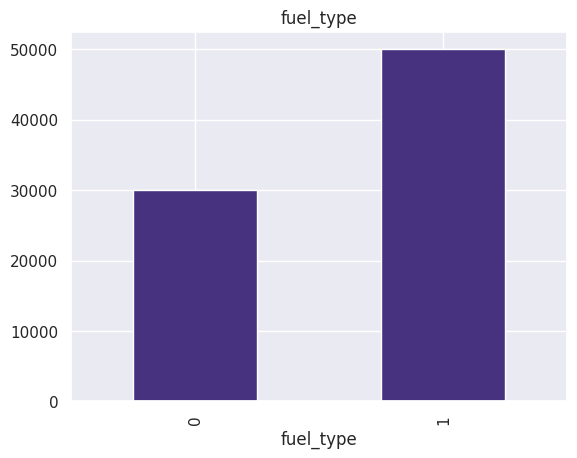

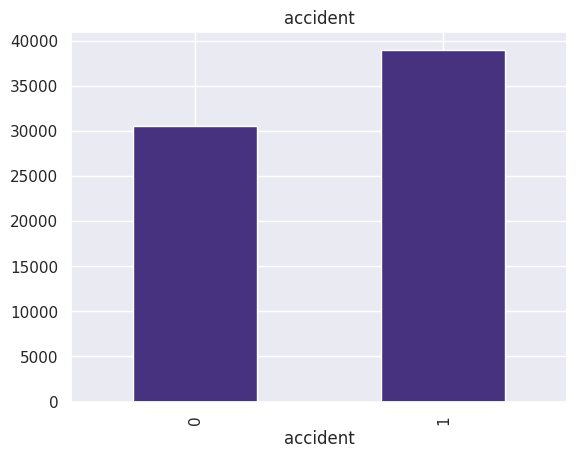

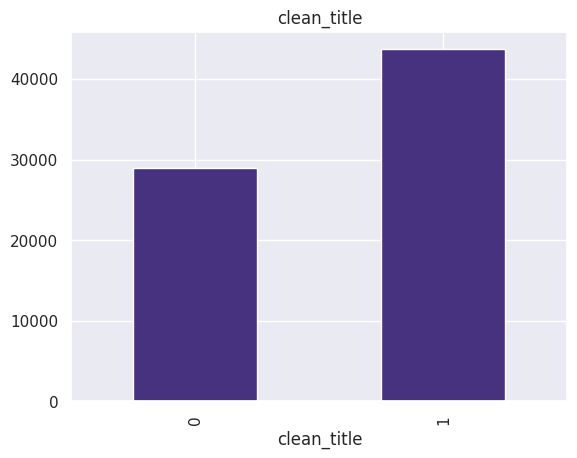

In [14]:
import matplotlib.pyplot as plt

#finding relationship between missing values and the price of the car
for feature in features_with_na:
    data = dataset.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the median Price where the information is missing or present
    data.groupby(feature)['price'].median().plot.bar()
    plt.title(feature)
    plt.show()

From the above illustrations we find that all the three features with missing values have an impact on the price hence the missing values in these features should be carefully handled in the feature engineering section

In [15]:
#Checking if ID column is truely unique
print(f"Id of Cars {len(dataset.id)}",f'\n Unique ids:{dataset.id.nunique()}')

Id of Cars 188533 
 Unique ids:188533


In [16]:
#Gathering numerical features
merged_data.describe().columns

Index(['id', 'model_year', 'milage', 'price'], dtype='object')

In [17]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  4


,id,model_year,milage,price
0,0,2007,213000,4200
1,1,2002,143250,4999
2,2,2002,136731,13900
3,3,2017,19500,45000
4,4,2021,7388,97500


From the numerical variables we have identified one year column, 'model_year' which we will be exploring further

Text(0.5, 1.0, 'Car Price vs MFG Year')

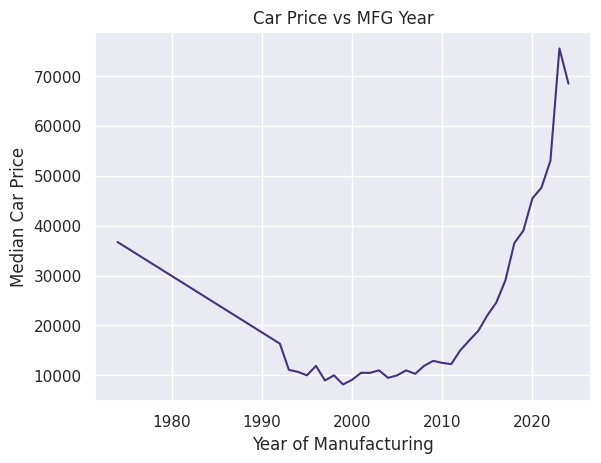

In [18]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year the car is sold and the price
dataset.groupby('model_year')['price'].median().plot()
plt.xlabel('Year of Manufacturing')
plt.ylabel('Median Car Price')
plt.title("Car Price vs MFG Year")

The graph shows that cars older than 50 years sell for greater values and the more the recent manufacturing date is, the higher the car will sell for

Text(0.5, 1.0, 'Car Price vs MFG Year')

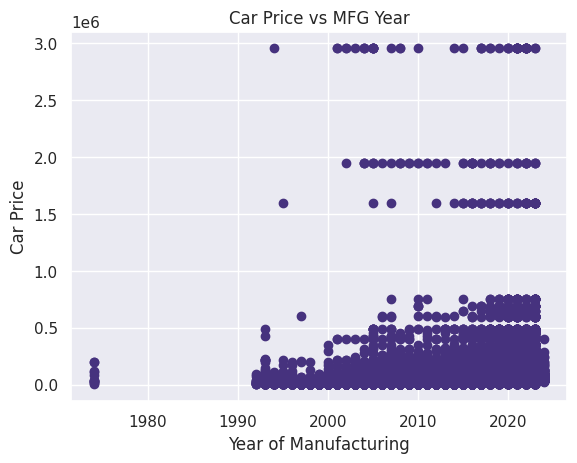

In [19]:
plt.scatter(dataset['model_year'],dataset['price'])
plt.xlabel('Year of Manufacturing')
plt.ylabel('Car Price')
plt.title("Car Price vs MFG Year")

### Discrete Variables

In [20]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in ['Id','model_year']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


Hence it is confirmed that there are no discrete variables in the dataset

### Continuous variables

In [21]:
#to check relationship between price and numerical variable
remaining_variables=[feature for feature in numerical_features if feature not in ['id','model_year']]
print("Remaining Variables Count: {}".format(len(remaining_variables)))

Remaining Variables Count: 2


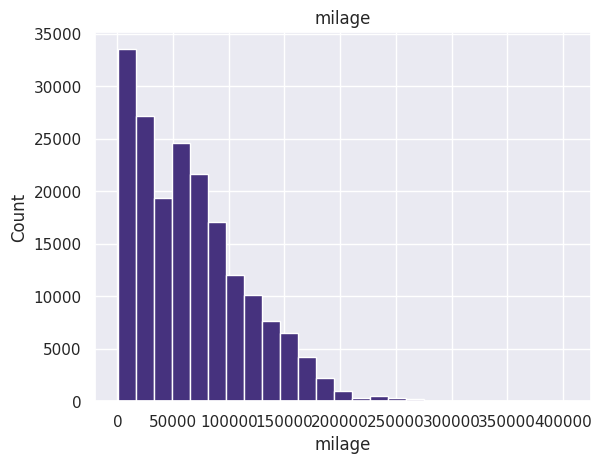

In [22]:
## Lets Find the realtionship between the continuous variables and Price

# for feature in remaining_variables:
feature = 'milage'
data=dataset.copy()
data[feature].hist(bins=25)
plt.xlabel(feature)
plt.ylabel("Count")
plt.title(feature)
plt.show()

Here we see the distribution of milage, which is the total odometer reading of the car, We can see that most of the cars in the dataset have been driven under 2,00,000 Miles

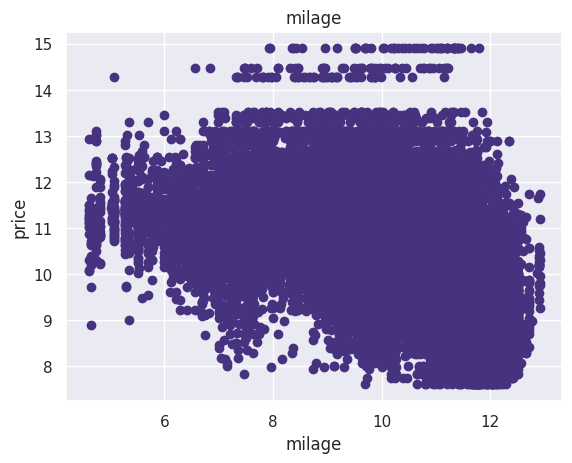

In [23]:
feature = 'milage'
if 0 in data[feature].unique():
    pass
else:
    data[feature]=np.log(data[feature])
    data['price']=np.log(data['price'])
    plt.scatter(data[feature],data['price'])
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(feature)
    plt.show()

Here we see that the more the milage (distance in odometer) the lesser the price of the car

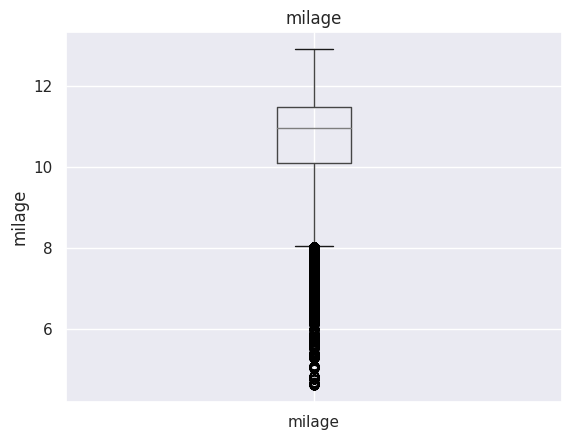

In [24]:
feature = 'milage'

data=dataset.copy()
if 0 in data[feature].unique():
    pass
else:
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()


We see that continous variable milage has a lot of outliers, which will be treated in the outlier handling section

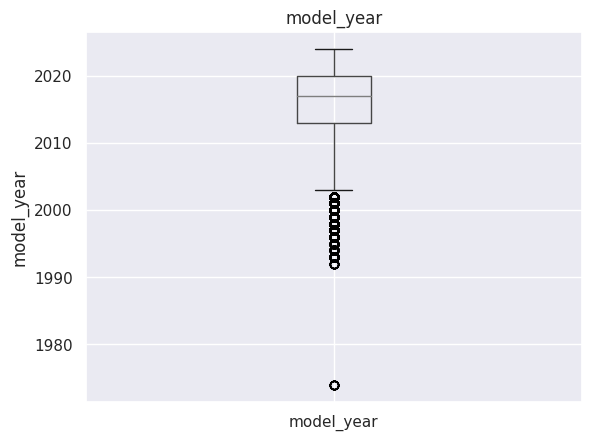

In [25]:
feature = 'model_year'

data = dataset.copy()
# data = data[data['model_year']!=data.model_year.min()]
if 0 in data[feature].unique():
    pass
else:
#     data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()


We see that even the model_year seems to have outliers

### Catgorical Variables

In [26]:
categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='O']
categorical_features

['brand',
 'model',
 'fuel_type',
 'engine',
 'transmission',
 'ext_col',
 'int_col',
 'accident',
 'clean_title']

In [27]:
dataset[categorical_features].head()

,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,MINI,Cooper S Base,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes
1,Lincoln,LS V8,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes
2,Chevrolet,Silverado 2500 LT,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes
3,Genesis,G90 5.0 Ultimate,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes
4,Mercedes-Benz,Metris Base,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes


In [28]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,dataset[feature].nunique()))

The feature is brand and number of categories are 57
The feature is model and number of categories are 1897
The feature is fuel_type and number of categories are 7
The feature is engine and number of categories are 1117
The feature is transmission and number of categories are 52
The feature is ext_col and number of categories are 319
The feature is int_col and number of categories are 156
The feature is accident and number of categories are 2
The feature is clean_title and number of categories are 1


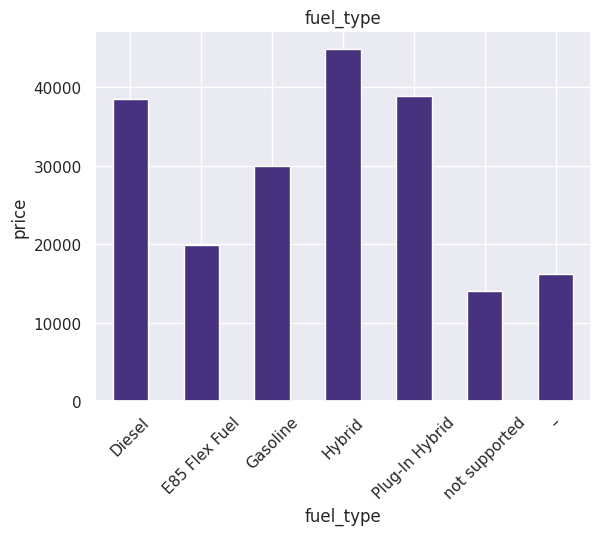

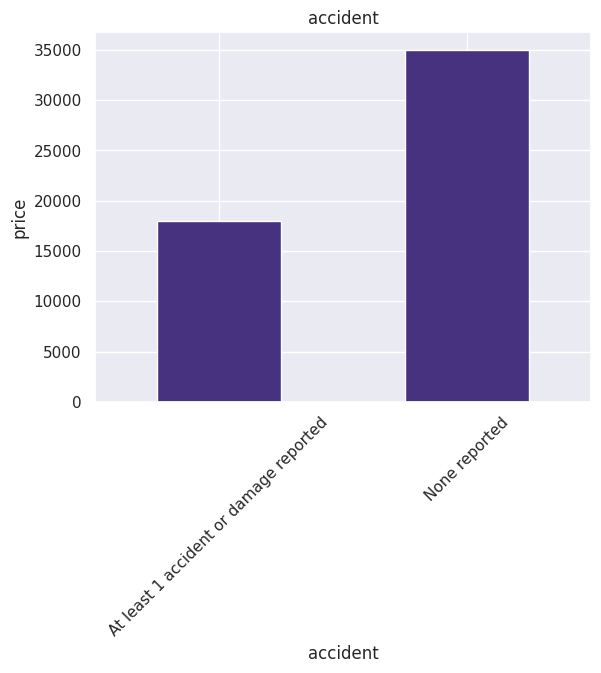

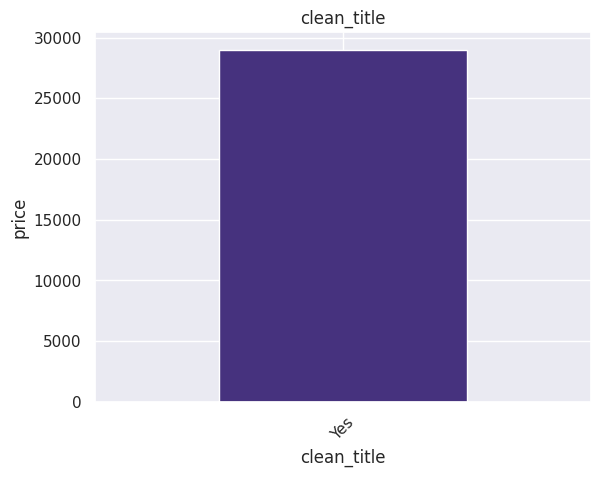

In [29]:
many_categories=[]

for feature in categorical_features:
    data=dataset.copy()
    if data[feature].nunique()<20:
        data.groupby(feature)['price'].median().plot.bar()
        plt.xlabel(feature)
        plt.ylabel('price')
        plt.title(feature)
        plt.xticks(rotation=45)
        plt.show()
    else:
        many_categories.append(feature)

In [30]:
many_categories

['brand', 'model', 'engine', 'transmission', 'ext_col', 'int_col']

These are the features that contain a lot of unique categories hence should be handled seperately in the feature engineering section

## Feature Engineering

In [31]:
#Using the complete data (test + train) for feature engineering
dataset = merged_data.copy()
dataset.reset_index(drop=True, inplace=True)

In [32]:
#Extract components from engine
dataset['horsepower'] = dataset['engine'].str.extract(r'(\d+\.?\d*)HP').astype(float)
dataset['displacement'] = dataset['engine'].str.extract(r'(\d+\.?\d*)L').astype(float)
dataset['cylinders'] = dataset['engine'].str.extract(r'(\d+) Cylinder').astype(float)

### Handling Missing Values

In [33]:
len(dataset[188533:])

125690

Kaggle specific task, where i am processing train and test data together to avoid redundant work

In [34]:
## Let us capture all the nan values in the categorical features
features_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(dataset[feature].isnull().mean()*100,4)))

fuel_type: 2.6943% missing values
accident: 1.2997% missing values
clean_title: 11.348% missing values


In [35]:
## Replace missing value with a new label unknown(unkwn)
def replace_cat_feature(dataset,features_nan):
    data=dataset.copy()
    data[features_nan]=data[features_nan].fillna('unkwn')
    return data

dataset=replace_cat_feature(dataset,features_nan)

dataset[features_nan].isnull().sum()

fuel_type      0
accident       0
clean_title    0
dtype: int64

In [36]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values
for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(dataset[feature].isnull().mean()*100,4)))

horsepower: 17.6435% missing value
displacement: 7.5173% missing value
cylinders: 20.051% missing value


Here we see that there are nan values in the newly created variable,we will be filling the nan with mean of the columns

In [37]:
dataset['horsepower'] = round(dataset['horsepower'].fillna(dataset['horsepower'].mean()),1)
dataset['displacement'] = round(dataset['displacement'].fillna(dataset['displacement'].mean()),1)
dataset['cylinders'] = round(dataset['cylinders'].fillna(dataset['cylinders'].mean()))

In [38]:
max_date = dataset['model_year'].max()
max_date

2024

In [39]:
# converting year value to age of the car by subtracting with latest date
dataset['model_year']= max_date-dataset['model_year']

In [40]:
num_features=['milage']

for feature in num_features:
    dataset[feature]=np.log(dataset[feature])

In [41]:
#Selecting only the brands with majority of the cars in the dataset
counts = dataset.brand.value_counts()
repl_cols = counts[counts<10886].index
dataset['brand'].replace(repl_cols,'uncommon',inplace=True)

/tmp/ipykernel_30/2514057594.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['brand'].replace(repl_cols,'uncommon',inplace=True)


In [42]:
#one hot encoding the brand column
dataset = pd.get_dummies(dataset,columns=['brand'],drop_first=True,dtype=int)

In [43]:
dataset.columns

Index(['id', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'horsepower', 'displacement', 'cylinders', 'brand_BMW',
       'brand_Chevrolet', 'brand_Ford', 'brand_Jeep', 'brand_Land',
       'brand_Lexus', 'brand_Mercedes-Benz', 'brand_Porsche', 'brand_Toyota',
       'brand_uncommon'],
      dtype='object')

### Handling rare categorical variables

In [44]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='O']
categorical_features

['model',
 'fuel_type',
 'engine',
 'transmission',
 'ext_col',
 'int_col',
 'accident',
 'clean_title']

In [45]:
for feature in categorical_features:
    temp=dataset.groupby(feature)['price'].count()/len(dataset)
    temp_df=temp[temp>0.01].index
    dataset[feature]=np.where(dataset[feature].isin(temp_df),dataset[feature],'Rare_var')
    

### Label Encoding

In [46]:
categorical_features

['model',
 'fuel_type',
 'engine',
 'transmission',
 'ext_col',
 'int_col',
 'accident',
 'clean_title']

In [47]:
# This label encoding step ensures that the order of categories based on their mean price is preserved.
for feature in categorical_features:
    labels_ordered=dataset.groupby([feature])['price'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset[feature]=dataset[feature].map(labels_ordered)

In [48]:
dataset.head()

,id,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,...,brand_BMW,brand_Chevrolet,brand_Ford,brand_Jeep,brand_Land,brand_Lexus,brand_Mercedes-Benz,brand_Porsche,brand_Toyota,brand_uncommon
0,0,2,17,12.269047,2,7,5,7,0,1,...,0,0,0,0,0,0,0,0,0,1
1,1,2,22,11.872347,2,7,5,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,2,2,22,11.825771,0,7,5,2,0,1,...,0,1,0,0,0,0,0,0,0,0
3,3,2,7,9.878170,2,7,9,4,2,1,...,0,0,0,0,0,0,0,0,0,1
4,4,2,3,8.907612,2,7,8,4,1,1,...,0,0,0,0,0,0,1,0,0,0


In [49]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
id,314223.0,157111.000000,90708.511155,0.00000,78555.500000,157111.000000,235666.500000,3.142220e+05
model,314223.0,1.961333,0.245655,0.00000,2.000000,2.000000,2.000000,2.000000e+00
model_year,314223.0,8.182991,5.666116,0.00000,4.000000,7.000000,11.000000,5.000000e+01
milage,314223.0,10.657323,1.152082,4.60517,10.094645,10.962839,11.466882,1.291164e+01
fuel_type,314223.0,2.111357,0.720000,0.00000,2.000000,2.000000,2.000000,5.000000e+00
engine,314223.0,6.911849,1.687233,0.00000,7.000000,7.000000,7.000000,1.300000e+01
transmission,314223.0,8.263221,4.366615,0.00000,5.000000,8.000000,10.000000,1.800000e+01
ext_col,314223.0,3.679953,1.953373,0.00000,3.000000,4.000000,5.000000,7.000000e+00
int_col,314223.0,2.404041,2.038792,0.00000,2.000000,2.000000,2.000000,8.000000e+00
accident,314223.0,0.792256,0.436556,0.00000,1.000000,1.000000,1.000000,2.000000e+00


In [50]:
scaling_feature=[feature for feature in dataset.columns if feature not in ['id','price'] ]
len(scaling_feature)

23

### Feature Scaling

In [51]:
feature_scale=[feature for feature in dataset.columns if feature not in ['id','price']]

# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# scaler.fit_transform(dataset[feature_scale])

from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(output_distribution='uniform')
scaler.fit_transform(dataset[feature_scale])

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit_transform(dataset[feature_scale])

array([[1.        , 0.90790791, 0.99264832, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.97747748, 0.91655538, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.97747748, 0.90036282, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.77827828, 0.65565566, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.77827828, 0.82432432, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.43493493, 0.57104162, ..., 0.        , 0.        ,
        0.        ]])

In [52]:
# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([dataset[['id', 'price']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(dataset[feature_scale]), columns=feature_scale)],
                    axis=1)

In [53]:
feature_scale=[feature for feature in dataset.columns if feature not in ['id','price','milage','accident']]

for i, feat in enumerate(feature_scale):
    dataset[feat] = np.log1p(dataset[feat])

In [54]:
feature_scale

['model',
 'model_year',
 'fuel_type',
 'engine',
 'transmission',
 'ext_col',
 'int_col',
 'clean_title',
 'horsepower',
 'displacement',
 'cylinders',
 'brand_BMW',
 'brand_Chevrolet',
 'brand_Ford',
 'brand_Jeep',
 'brand_Land',
 'brand_Lexus',
 'brand_Mercedes-Benz',
 'brand_Porsche',
 'brand_Toyota',
 'brand_uncommon']

In [55]:
# Apply log1p transformation on the 'price' column
# dataset['price'] = np.log1p(dataset['price'])

In [56]:
data.shape

(314223, 25)

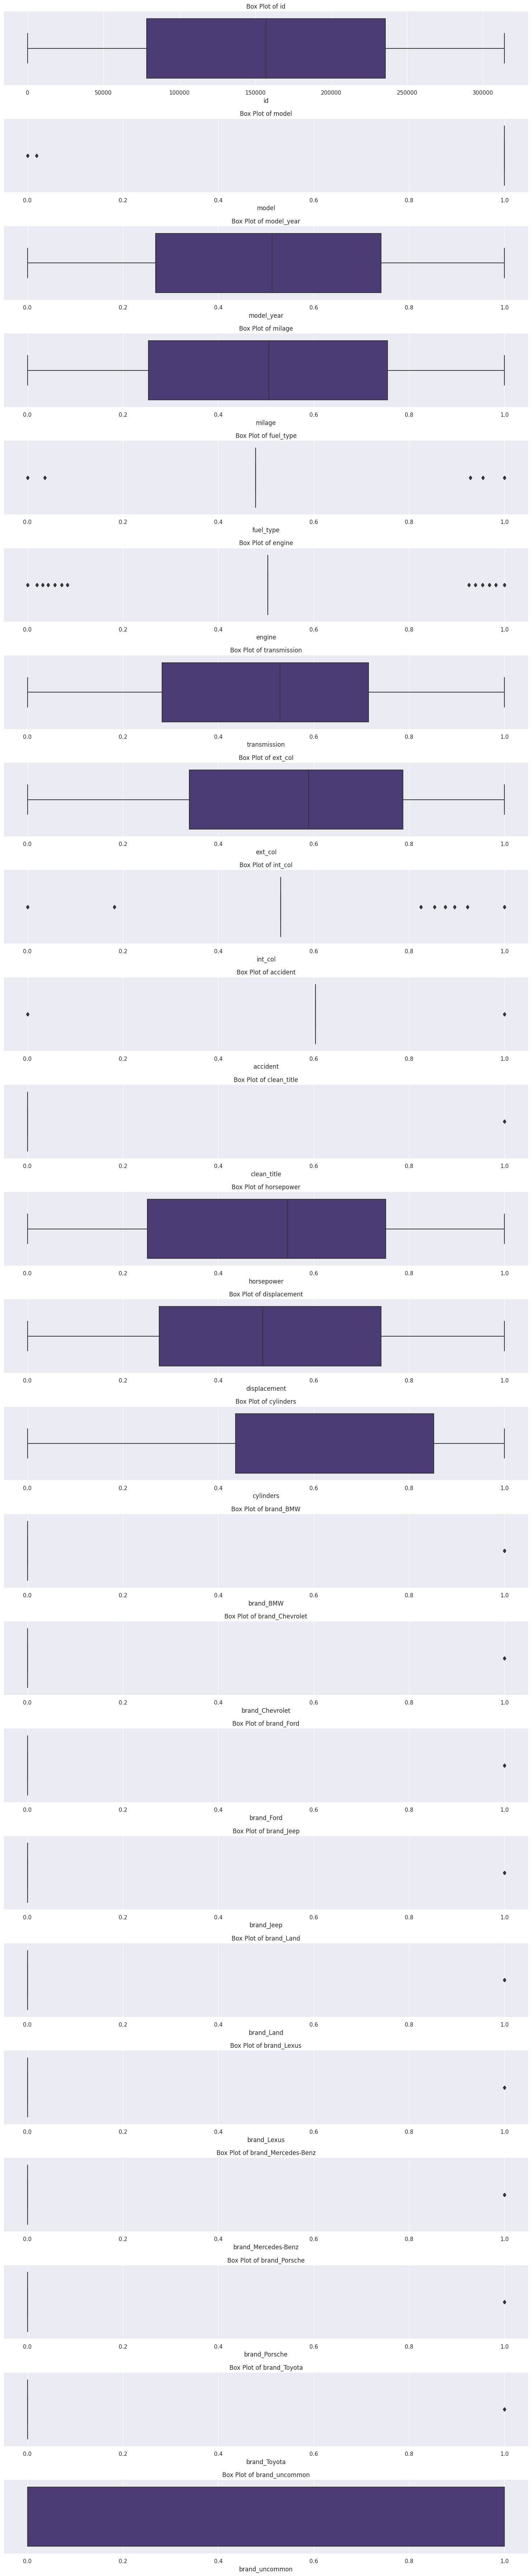

In [57]:
import seaborn as sns
numeric_cols = data.drop('price', axis=1).select_dtypes(include=['float64', 'int64']).columns

# Set the figure size for better readability
plt.figure(figsize=(15, len(numeric_cols) * 3))

# Loop through all numerical columns and plot a boxplot for each
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot of {col}', fontsize=12)

plt.tight_layout()
plt.show()

In [58]:
train_df = data[0:188533]
test_df = data[188533:]

In [59]:
# train_df.to_csv('training data.csv')

### Data inspection

In [60]:
dataset.columns

Index(['id', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'horsepower', 'displacement', 'cylinders', 'brand_BMW',
       'brand_Chevrolet', 'brand_Ford', 'brand_Jeep', 'brand_Land',
       'brand_Lexus', 'brand_Mercedes-Benz', 'brand_Porsche', 'brand_Toyota',
       'brand_uncommon'],
      dtype='object')

In [61]:
# Handle infinite values (if any)
# train_df = train_df.replace([np.inf, -np.inf], np.nan)  # Replace inf with NaN
# import seaborn as sns
# plt.figure(figsize=(15, 12))

# for i, c in enumerate(train_df.drop(['id','model','fuel_type'],axis=1).select_dtypes(include='number').columns):
#     # Subplot without auto-removal
#     ax = plt.subplot(5, 2, i+1)
#     sns.histplot(train_df[c], ax=ax)  # Use ax argument to avoid overlap
#     plt.title('Distribution plot for field:' + c)
#     plt.xlabel('')
#     plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

# plt.show()

In [62]:
# train_df.corr().style.background_gradient(cmap='viridis')

In [63]:
test_df.reset_index(drop=True, inplace=True)
test_df.head()

,id,price,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,...,brand_BMW,brand_Chevrolet,brand_Ford,brand_Jeep,brand_Land,brand_Lexus,brand_Mercedes-Benz,brand_Porsche,brand_Toyota,brand_uncommon
0,188533,43878.016178,1.0,0.649149,0.767267,0.478478,0.020020,0.101602,0.339339,0.182182,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,188534,43878.016178,1.0,0.268769,0.106340,0.954454,0.504004,0.715215,0.000000,0.531031,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,188535,43878.016178,1.0,0.092092,0.290327,0.478478,0.504004,0.901902,0.339339,1.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,188536,43878.016178,1.0,0.583083,0.533304,0.478478,0.504004,0.867868,1.000000,0.531031,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,188537,43878.016178,1.0,0.434935,0.514515,0.478478,0.504004,0.282282,0.787287,0.531031,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_df.drop(['id','price'], axis=1), train_df['price'], test_size=0.25, random_state=123)

In [65]:
print('Train values shape:', X_train.shape)
print('Test values shape:', X_test.shape)
print('Train target shape:', y_train.shape)
print('Test target shape:', y_test.shape)

Train values shape: (141399, 23)
Test values shape: (47134, 23)
Train target shape: (141399,)
Test target shape: (47134,)


In [66]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141399 entries, 136044 to 15725
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   model                141399 non-null  float64
 1   model_year           141399 non-null  float64
 2   milage               141399 non-null  float64
 3   fuel_type            141399 non-null  float64
 4   engine               141399 non-null  float64
 5   transmission         141399 non-null  float64
 6   ext_col              141399 non-null  float64
 7   int_col              141399 non-null  float64
 8   accident             141399 non-null  float64
 9   clean_title          141399 non-null  float64
 10  horsepower           141399 non-null  float64
 11  displacement         141399 non-null  float64
 12  cylinders            141399 non-null  float64
 13  brand_BMW            141399 non-null  float64
 14  brand_Chevrolet      141399 non-null  float64
 15  brand_Ford        

In [67]:
# # X_train = X_train.replace([np.inf, -np.inf], np.nan) 
# X_train.model_year.fillna(X_train.model_year.mean(),inplace=True)
# X_train.engine_encoded.fillna(X_train.engine_encoded.mean(),inplace=True)

## Model Training and evaluation

In [68]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

#model selection
dtr=DecisionTreeRegressor(criterion ='poisson',random_state=2529, max_depth=7)
# train model
dtr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=7, random_state=2529)

In [69]:
y_pred = dtr.predict(X_test)
y_pred

array([19210.12011305, 62384.54473684, 54806.30750308, ...,
       13294.76586687, 49922.00445269,  9961.98014184])

In [70]:
rmse_dtr = mean_squared_error(y_test, y_pred, squared=False)
rmse_dtr

74638.97622994668

## Hyperparameter tuning

In [71]:
from sklearn.model_selection import KFold, cross_val_score, cross_validate

def rmse_scorer(model, X,Y):
    cv_results = cross_validate(model, X, Y, cv=5, scoring='neg_root_mean_squared_error')
    validation_score = np.mean(cv_results['test_score'])
    return abs(validation_score)

def subfile_builder(model_name, y_pred):
    sub = pd.read_csv('/kaggle/input/playground-series-s4e9/sample_submission.csv')
    # To ensure that y_pred and id are a 1D array
    sub['id'] = sub['id'].values.ravel()
    y_test_predictions = y_pred.ravel()
    
    results = pd.DataFrame({'id': sub['id'], 'price': y_test_predictions})
    results.to_csv(f'/kaggle/working/submission_{model_name}.csv', index = False)
    
    return print('File saved, ready for submission!')

In [72]:
params = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],  # Different loss functions
    'splitter': ['best', 'random'],          # Strategy to split at each node
    'max_depth': [None, 1,2,3,4,5,6,7,8,9], # Maximum depth of the tree
    'min_samples_leaf': [1, 2, 5, 10],       # Minimum number of samples required at each leaf node
    'max_features': [None, 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'min_impurity_decrease': [0.0, 0.01, 0.1],  # A node will be split only if this split induces a decrease in impurity
}


In [73]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(dtr,param_grid=params,cv=5, n_jobs=-1)

In [74]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [75]:
y_pred =  model.predict(X_train)
y_test_pred = model.predict(X_test)

In [78]:
mean_squared_error(y_train, y_pred, squared=False) , rmse_scorer(model,X_test,y_test)

(74716.98370893672, 72069.0597384707)

In [79]:
X_train.shape

(141399, 23)

In [80]:
from lightgbm import LGBMRegressor

best_params ={'num_leaves': 25,
     'colsample_bytree': 0.7980570179314046,
     'subsample': 0.596167330581604,
     'learning_rate': 0.07313853316943522,
     'max_depth': 2,
     'n_estimators': 2760,
     'reg_alpha': 8.258841989240594e-09,
     'reg_lambda': 0.0703086285482539,
             }

lgbm_reg = LGBMRegressor(**best_params, verbose=-1)

In [81]:
lgbm_reg.fit(X_train, y_train)
pred = lgbm_reg.predict(X_test)
mean_squared_error(y_test, pred, squared=False) , rmse_scorer(lgbm_reg,X_test,y_test)

(70988.38838417207, 71641.85291169483)

In [ ]:
y_test_predictions = lgbm_reg.predict(test_df)

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers

# Assuming X_train and y_train are your training data

# Create the neural network model
model = Sequential([
    layers.Input(shape=(23,)),  # Input layer with 23 features
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    layers.Dense(32, activation='relu'),  # Another hidden layer
    layers.Dense(1)  # Output layer with 1 neuron for regression
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='mean_squared_error')

# Train the model
# model.fit(X_train, y_train, epochs=50, batch_size=32)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# Assuming X_test and y_test are your test data
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("R-squared:", r2)
print("Mean Squared Error:", rmse)

In [ ]:
test_df.drop(['id','price'], axis=1, inplace=True)

In [ ]:
y_test_predictions = model.predict(test_df)

In [ ]:
from xgboost import XGBRegressor

best_params = {
            'lambda': 1.5465677354609213,
            'alpha': 0.0016104367941295323,
            'colsample_bytree': 0.6,
            'subsample': 0.5,
            'learning_rate': 0.02,
            'min_child_weight': 1016,
            'max_depth': 11,
}

xgb_model = XGBRegressor(**best_params, verbose=-1)

In [ ]:
xgb_model.fit(X_train, y_train)

In [ ]:
pred = xgb_model.predict(X_test)
mean_squared_error(y_test, pred, squared=False)

In [ ]:
rmse_scorer(xgb_model,X_test,y_test)

In [82]:
from sklearn.ensemble import RandomForestRegressor
import optuna
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

rfr = RandomForestRegressor(random_state=13)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

In [85]:
mean_squared_error(y_test, y_pred, squared=False) #, rmse_scorer(rfr,X_test,y_test)

76669.66666203324

# Submission file

In [96]:
pd.read_csv('/kaggle/working/submission.csv')

,id,price
0,188533,16262.305934
1,188534,73842.217386
2,188535,57214.700274
3,188536,28233.105230
4,188537,28991.218145
...,...,...
125685,314218,30367.279838
125686,314219,44788.124217
125687,314220,22238.586314
125688,314221,16625.115147
